## Analysis goal
- CPU와 GPU가 무어의 법칙을 따르는가 - 무어의 법칙을 설명해야함
- 세계 CPU and GPU성능에 따른 대한민국 반도체 및 디스플레이 동향파악
- 대한민국 반도체, 디스플레이 시장이 CPU와 GPU의 연관성
- 반도체 시장은 CPU, GPU의 연관성
- 디스플레이 시장은 CPU, GPU의 연관성
- (CPU는 반도체 시장과 연관이 있고, GPU는 디스플레이 시장과 연관이 있을꺼라는 추측)

- 스마트폰 가격 예측?
- 무어의 법칙 선

- DRAM과 상관도(x)

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [243]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [244]:
with open('mydataframe.pickle', 'rb') as f:
    df = pickle.load(f)
    
chip_data = df[0].reset_index()
chip_data

,년도,Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
0,2004,109.705882,121.384615,104.213235,332.938462,2267.705882,367.376923
1,2005,92.954545,112.315789,230.584416,294.684211,2409.831169,405.273684
2,2006,75.925926,93.178295,478.266667,348.031008,2370.696296,460.472868
3,2007,70.869565,80.031646,398.014493,388.797468,2180.652174,524.360759
4,2008,58.571429,63.439306,606.089286,566.826590,2287.241071,564.190751
5,2009,45.913043,52.783019,533.860870,613.830189,2519.904348,584.584906
6,2010,40.576389,42.870748,539.958333,972.979592,2477.243056,613.741497
7,2011,33.465409,39.280702,976.616352,1228.198830,2355.496855,641.356725
8,2012,27.455696,33.653179,1602.253165,1685.982659,2604.468354,696.046243
9,2013,25.007143,28.971292,1577.800000,2150.435407,2377.207143,744.693780


# CPU와 GPU(발전)가 무어의 법칙을 따르는가 

***무어의 법칙 설명***

***무어의 법칙을 따르는 선 하나 긋기***

***CPU와 GPU의 발전 속도를 분석***

In [245]:
first = int(104.213235)
list1 = [first]

for i in range(1, 16):
    filter1 = i%2
    if filter1 == 1:
        list1.append('NaN')
    else:
        first *= 2
        second = first
        list1.append(second)

first = int(332.938462)
list2 = [first]        
for e in range(1, 16):
    filter2 = e%2
    if filter2 == 1:
        list2.append('NaN')
    else:
        first *= 2
        second = first
        list2.append(second)
        
        
df_list = pd.DataFrame(list1)
df_list2 = pd.DataFrame(list2)
chip_data['Moores_raw_CPU'] = df_list
chip_data['Moores_raw_GPU'] = df_list2

In [246]:
chip_data

,년도,Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU,Moores_raw_CPU,Moores_raw_GPU
0,2004,109.705882,121.384615,104.213235,332.938462,2267.705882,367.376923,104,332
1,2005,92.954545,112.315789,230.584416,294.684211,2409.831169,405.273684,NaN,NaN
2,2006,75.925926,93.178295,478.266667,348.031008,2370.696296,460.472868,208,664
3,2007,70.869565,80.031646,398.014493,388.797468,2180.652174,524.360759,NaN,NaN
4,2008,58.571429,63.439306,606.089286,566.826590,2287.241071,564.190751,416,1328
5,2009,45.913043,52.783019,533.860870,613.830189,2519.904348,584.584906,NaN,NaN
6,2010,40.576389,42.870748,539.958333,972.979592,2477.243056,613.741497,832,2656
7,2011,33.465409,39.280702,976.616352,1228.198830,2355.496855,641.356725,NaN,NaN
8,2012,27.455696,33.653179,1602.253165,1685.982659,2604.468354,696.046243,1664,5312
9,2013,25.007143,28.971292,1577.800000,2150.435407,2377.207143,744.693780,NaN,NaN


/tmp/ipykernel_3096/918409858.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(chip_data['년도'], rotation = 45)
/tmp/ipykernel_3096/918409858.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(chip_data['년도'], rotation = 45)
/tmp/ipykernel_3096/918409858.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(chip_data['년도'], rotation = 45)


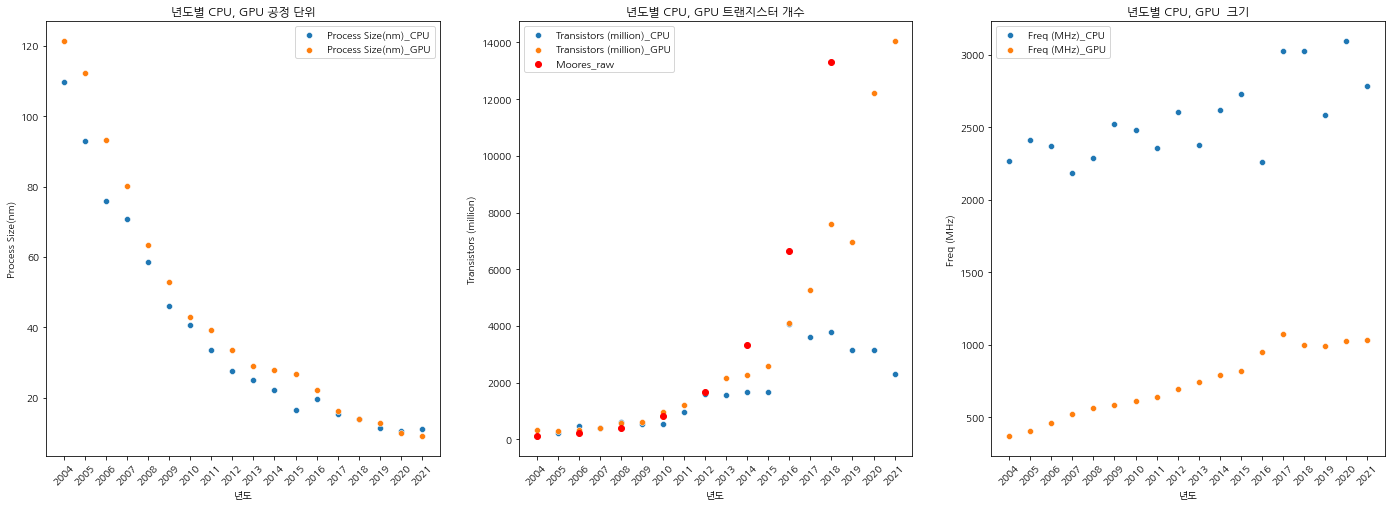

In [247]:
# 데이터 년도별 분석

fig, axes = plt.subplots(1,3, figsize = (24,8))

m = sns.scatterplot(data = chip_data, x = '년도', y = 'Process Size(nm)_CPU', ax = axes[0])
sns.scatterplot(data = chip_data, x = '년도', y = 'Process Size(nm)_GPU', ax = axes[0])

axe = m.axes
axe.set_xticklabels(chip_data['년도'], rotation = 45)
axe.set_title('년도별 CPU, GPU 공정 단위')
axe.set_ylabel('Process Size(nm)')

axes[0].legend(labels=["Process Size(nm)_CPU","Process Size(nm)_GPU"])
# CPU와 GPU모두 공정 단위는 급수적으로 감소하고 있다.

# axes[1]
g = sns.scatterplot(data = chip_data, x = '년도', y = 'Transistors (million)_CPU', ax = axes[1])
sns.scatterplot(data = chip_data, x = '년도', y = 'Transistors (million)_GPU', ax = axes[1])

axe = g.axes
axe.set_xticklabels(chip_data['년도'], rotation = 45)
axe.set_title('년도별 CPU, GPU 트랜지스터 개수')
axe.set_ylabel('Transistors (million)')



# 2018년도부터 GPU의 연산속도를 높이기 위해 급격하게 Transistor의 갯수를 많이 넣고있다. ==> 이유 : AI가 주목받기 시작한 시점부터
# CPU도 2018년도까지 무어의 법칙을 따르다가  2018년도부터는 반대로 트랜지스터의 개수가 줄어들고 있다. ==> 이유 : 기술적 한계
# CPU는 기술이 성숙기에 접어들었다고 생각

# axes[2]

a = sns.scatterplot(data = chip_data, x = '년도', y = 'Freq (MHz)_CPU', ax = axes[2])
sns.scatterplot(data = chip_data, x = '년도', y = 'Freq (MHz)_GPU', ax = axes[2])

axe = a.axes
axe.set_xticklabels(chip_data['년도'], rotation = 45)
axe.set_title('년도별 CPU, GPU  크기')
axe.set_ylabel('Freq (MHz)')

axes[2].legend(labels=["Freq (MHz)_CPU","Freq (MHz)_GPU"])

# CPU는 GPU보다 비교적 high 주파수를 활용하고 있고, GPU의 주파수도 점점 catch up하는 중이다.


# 무어의 법칙 넣기
#sns.scatterplot(data = chip_data, x = '년도', y = 'Moores_raw_CPU', c = 'r', ax = axes[1])
axes[1].scatter(chip_data['년도'], chip_data['Moores_raw_CPU'], c = 'r', label = 'Moores_raw_CPU')

axes[1].legend(labels=["Transistors (million)_CPU","Transistors (million)_GPU", 'Moores_raw'])

In [248]:
# EDA에서 본 결과들 정밀 분석

#GPU 상관도 측정

corr_GPU_tran = np.corrcoef(chip_data['Transistors (million)_GPU'], chip_data['Freq (MHz)_GPU'])[0,1]
print('GPU의 트랜지스터와 주파수 상관도 : ', corr_GPU_tran)

corr_GPU_proc = np.corrcoef(chip_data['Process Size(nm)_GPU'], chip_data['Transistors (million)_GPU'])[0,1]
print('GPU의 단위 공정과 트랜지스터 상관도 : ', corr_GPU_proc)

corr_GPU_freq = np.corrcoef(chip_data['Process Size(nm)_GPU'], chip_data['Freq (MHz)_GPU'])[0,1]
print('GPU의 단위 공정과 주파수 상관도 : ', corr_GPU_proc)

##########################################################################################
#CPU 상관도 측정

corr_CPU_tran = np.corrcoef(chip_data['Transistors (million)_CPU'], chip_data['Freq (MHz)_CPU'])[0,1]
print('CPU의 트랜지스터와 주파수 상관도 : ', corr_CPU_tran)

corr_CPU_proc = np.corrcoef(chip_data['Process Size(nm)_CPU'], chip_data['Transistors (million)_CPU'])[0,1]
print('CPU의 단위 공정과 트랜지스터 상관도 : ', corr_CPU_proc)

corr_CPU_freq = np.corrcoef(chip_data['Process Size(nm)_CPU'], chip_data['Freq (MHz)_CPU'])[0,1]
print('CPU의 단위 공정과 주파수 상관도 : ', corr_CPU_freq)

# 0.7이상인 것 == GPU의 트랜지스터와 주파수 상관도, CPU의 단위 공정과 트랜지스터 상관도

GPU의 트랜지스터와 주파수 상관도 :  0.8172249748388621
GPU의 단위 공정과 트랜지스터 상관도 :  -0.6728495023009691
GPU의 단위 공정과 주파수 상관도 :  -0.6728495023009691
CPU의 트랜지스터와 주파수 상관도 :  0.6416900063411868
CPU의 단위 공정과 트랜지스터 상관도 :  -0.783210619089342
CPU의 단위 공정과 주파수 상관도 :  -0.6482582509198672


Text(0.5, 1.0, 'GPU Transistor와 Process Size 관계')

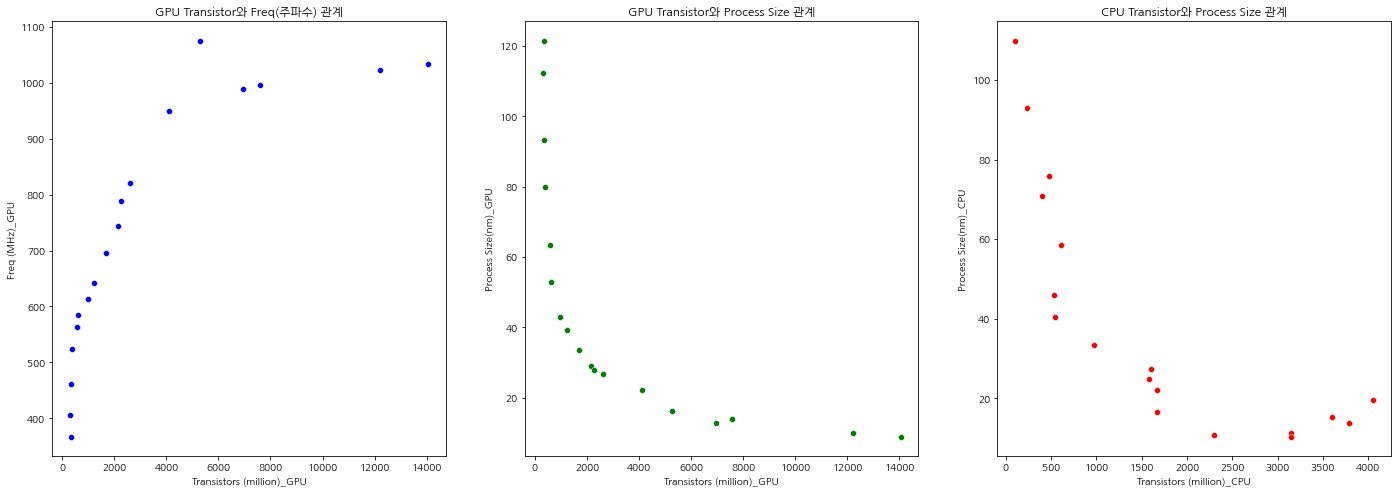

In [249]:
fig, axes = plt.subplots(1,3, figsize = (24,8))

sns.scatterplot(data = chip_data, x = 'Transistors (million)_GPU', y = 'Freq (MHz)_GPU', c ='b', ax = axes[0])
axes[0].set_title('GPU Transistor와 Freq(주파수) 관계')

sns.scatterplot(data = chip_data, x = 'Transistors (million)_CPU', y = 'Process Size(nm)_CPU', c = 'r', ax = axes[2])
axes[2].set_title('CPU Transistor와 Process Size 관계')

sns.scatterplot(data = chip_data, x = 'Transistors (million)_GPU', y = 'Process Size(nm)_GPU', c = 'g', ax = axes[1])
axes[1].set_title('GPU Transistor와 Process Size 관계')


# GPU는 Transistor 갯수가 증가할수록 그에 맞춰 Freq(주파수)도 증가한다.
# 또한, GPU는 단위공정이 줄어들수록 CPU와 반대로 훨씬 많은량의 Transistor를 넣고있다.
#                                      ==> 성능향상에 목표를 두고 기하급수적으로 성능향상하고있다.

# CPU는 공정의 단위가 줄어들수록 그에 들어가는 Transistor의 갯수도 증가한다. ==> 기술력 향상
# but, 최근들어 CPU의 공정단위는 기하급수적으로 줄어들고 있지만, Transsitor 갯수는 그에 맞춰 증가하지 못한다 ==> 기술력의 한계에 다 다랐다.

# CPU보다는 GPU의 발전에 조금 더 초점을 맞춰야한다.

# CPU와 GPU(발전)가 무어의 법칙을 따르는가 - 끝 

# 반도체 및 디스플레이 생산 그리고 시장 점유율 분석

In [250]:
kr_data = df[1]
kr_data

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(억불),반도체_수출증가율(퍼센트),반도체_수입(억불),반도체_수입증가율(퍼센트),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(억불),디스플레이_수출증가율(퍼센트),디스플레이_수입(억불),디스플레이_수입증가율(퍼센트),LCD_평균가격(달러),Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,,,,,
2004,34.60,9.6,265.2,35.7,236.2,10.7,1.72,33.00,38.7,14,75.0,10,42.9,28.9,109.71,121.38,104.21,332.94,2267.71,367.38
2005,32.40,10.5,299.8,13.1,251.3,6.4,2.16,36.00,40.7,49,250.0,10,0.0,28.0,92.95,112.32,230.58,294.68,2409.83,405.27
2006,32.40,11.3,373.6,24.6,280.4,11.6,1.59,40.60,40.6,125,155.1,12,20.0,25.8,75.93,93.18,478.27,348.03,2370.70,460.47
2007,37.50,11.4,390.4,4.5,308.2,9.9,2.17,43.60,40.4,171,36.8,30,150.0,23.8,70.87,80.03,398.01,388.80,2180.65,524.36
2008,36.40,9.8,327.9,-16.0,320.2,3.9,0.93,51.90,39.5,188,9.9,39,30.0,30.1,58.57,63.44,606.09,566.83,2287.24,564.19
2009,40.80,11.7,310.4,-5.3,266.2,-16.9,0.66,72.60,45.3,256,36.2,42,7.7,28.6,45.91,52.78,533.86,613.83,2519.90,584.58
2010,51.20,14.3,507.1,63.4,311.4,17.0,1.20,90.00,45.7,332,29.7,52,23.8,31.9,40.58,42.87,539.96,972.98,2477.24,613.74
2011,61.50,13.8,501.4,-1.1,324.8,4.3,0.60,86.70,47.6,333,0.3,51,-1.9,30.1,33.47,39.28,976.62,1228.20,2355.50,641.36
2012,64.50,14.3,504.3,0.6,322.4,-0.8,1.60,82.30,50.7,368,10.5,45,-11.8,34.7,27.46,33.65,1602.25,1685.98,2604.47,696.05


In [251]:
kr_data = kr_data.drop(['반도체_수출증가율(퍼센트)', '반도체_수입증가율(퍼센트)', '디스플레이_수출증가율(퍼센트)', '디스플레이_수입증가율(퍼센트)']
                      ,axis = 1)
kr_data

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(억불),반도체_수입(억불),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(억불),디스플레이_수입(억불),LCD_평균가격(달러),Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,
2004,34.60,9.6,265.2,236.2,1.72,33.00,38.7,14,10,28.9,109.71,121.38,104.21,332.94,2267.71,367.38
2005,32.40,10.5,299.8,251.3,2.16,36.00,40.7,49,10,28.0,92.95,112.32,230.58,294.68,2409.83,405.27
2006,32.40,11.3,373.6,280.4,1.59,40.60,40.6,125,12,25.8,75.93,93.18,478.27,348.03,2370.70,460.47
2007,37.50,11.4,390.4,308.2,2.17,43.60,40.4,171,30,23.8,70.87,80.03,398.01,388.80,2180.65,524.36
2008,36.40,9.8,327.9,320.2,0.93,51.90,39.5,188,39,30.1,58.57,63.44,606.09,566.83,2287.24,564.19
2009,40.80,11.7,310.4,266.2,0.66,72.60,45.3,256,42,28.6,45.91,52.78,533.86,613.83,2519.90,584.58
2010,51.20,14.3,507.1,311.4,1.20,90.00,45.7,332,52,31.9,40.58,42.87,539.96,972.98,2477.24,613.74
2011,61.50,13.8,501.4,324.8,0.60,86.70,47.6,333,51,30.1,33.47,39.28,976.62,1228.20,2355.50,641.36
2012,64.50,14.3,504.3,322.4,1.60,82.30,50.7,368,45,34.7,27.46,33.65,1602.25,1685.98,2604.47,696.05


In [252]:
# 억불 ==> 조원으로 단위 맞춤

kr_data['반도체_수출(조원)'] = kr_data['반도체_수출(억불)'] * 1344 / 10000
kr_data['반도체_수입(조원)'] = kr_data['반도체_수입(억불)'] * 1344 / 10000
kr_data['디스플레이_수출(조원)'] = kr_data['디스플레이_수출(억불)'] * 1344 / 10000
kr_data['디스플레이_수입(조원)'] = kr_data['디스플레이_수입(억불)'] * 1344 / 10000

In [253]:
kr_data.drop(['반도체_수출(억불)', '반도체_수입(억불)', '디스플레이_수출(억불)', '디스플레이_수입(억불)'],
                       axis = 1, inplace = True)

In [254]:
# 컬럼 순서 변경
kr_data = kr_data[['반도체_생산(조원)', '반도체_시장점유율(퍼센트)','반도체_수출(조원)', '반도체_수입(조원)', 
                  'DRAM_가격(달러)', '디스플레이_생산(조원)', '디스플레이_시장점유율(퍼센트)','디스플레이_수출(조원)', 
                  '디스플레이_수입(조원)','LCD_평균가격(달러)', 'Process Size(nm)_CPU', 
                  'Transistors (million)_CPU', 'Freq (MHz)_CPU', 
                  'Process Size(nm)_GPU', 'Transistors (million)_GPU', 'Freq (MHz)_GPU']]
kr_data

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(조원),반도체_수입(조원),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(조원),디스플레이_수입(조원),LCD_평균가격(달러),Process Size(nm)_CPU,Transistors (million)_CPU,Freq (MHz)_CPU,Process Size(nm)_GPU,Transistors (million)_GPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,
2004,34.60,9.6,35.64288,31.74528,1.72,33.00,38.7,1.8816,1.3440,28.9,109.71,104.21,2267.71,121.38,332.94,367.38
2005,32.40,10.5,40.29312,33.77472,2.16,36.00,40.7,6.5856,1.3440,28.0,92.95,230.58,2409.83,112.32,294.68,405.27
2006,32.40,11.3,50.21184,37.68576,1.59,40.60,40.6,16.8000,1.6128,25.8,75.93,478.27,2370.70,93.18,348.03,460.47
2007,37.50,11.4,52.46976,41.42208,2.17,43.60,40.4,22.9824,4.0320,23.8,70.87,398.01,2180.65,80.03,388.80,524.36
2008,36.40,9.8,44.06976,43.03488,0.93,51.90,39.5,25.2672,5.2416,30.1,58.57,606.09,2287.24,63.44,566.83,564.19
2009,40.80,11.7,41.71776,35.77728,0.66,72.60,45.3,34.4064,5.6448,28.6,45.91,533.86,2519.90,52.78,613.83,584.58
2010,51.20,14.3,68.15424,41.85216,1.20,90.00,45.7,44.6208,6.9888,31.9,40.58,539.96,2477.24,42.87,972.98,613.74
2011,61.50,13.8,67.38816,43.65312,0.60,86.70,47.6,44.7552,6.8544,30.1,33.47,976.62,2355.50,39.28,1228.20,641.36
2012,64.50,14.3,67.77792,43.33056,1.60,82.30,50.7,49.4592,6.0480,34.7,27.46,1602.25,2604.47,33.65,1685.98,696.05


In [255]:
ko_data = kr_data.reset_index()

ko_data['반도체 수출/생산(퍼센트)'] = ko_data['반도체_수출(조원)']/ko_data['반도체_생산(조원)'] * 100
ko_data['디스플레이 수출/생산(퍼센트)'] = ko_data['디스플레이_수출(조원)']/ko_data['디스플레이_생산(조원)'] * 100

/tmp/ipykernel_3096/3056855490.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(ko_data['년도'], rotation = 45)
/tmp/ipykernel_3096/3056855490.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(ko_data['년도'], rotation = 45)


<Axes: title={'center': '년도별 반도체 디스플레이 시장점유율 비교'}, xlabel='년도', ylabel='반도체_시장점유율(퍼센트)'>

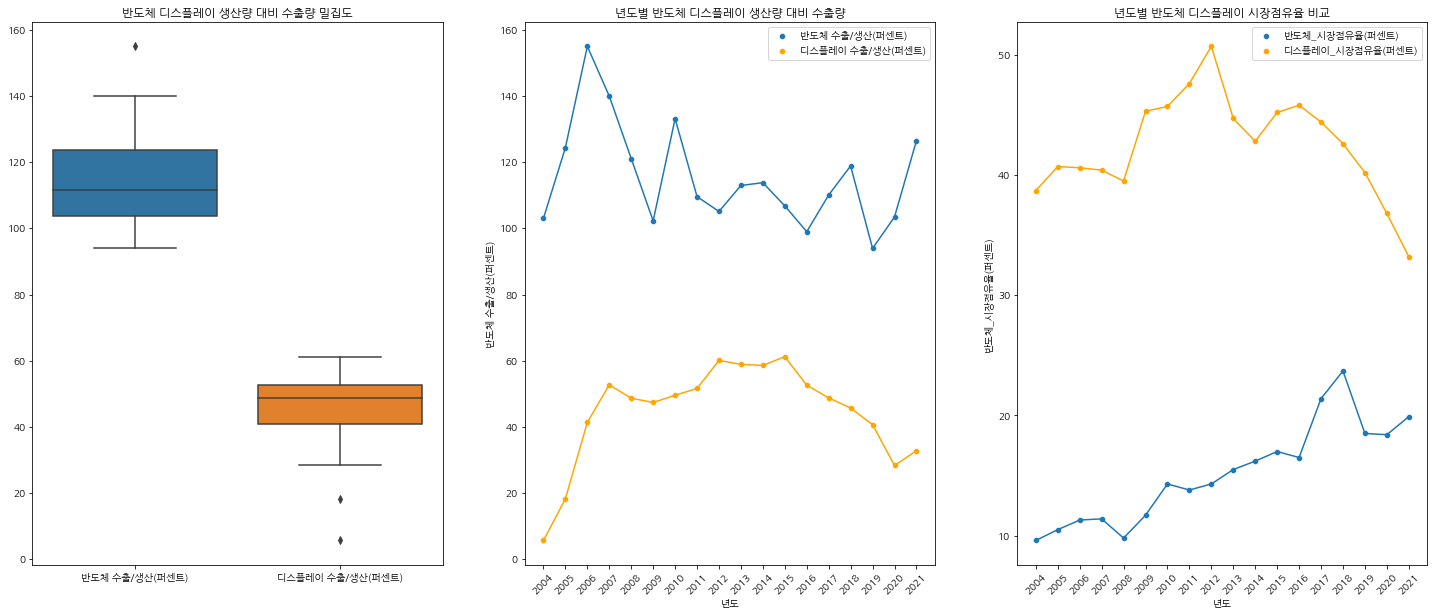

In [256]:
# 반도체, 디스플레이 생산량 대비 수출량(퍼센트) ==  수출 / 생산 (반도체, 디스플레이 GDP지수)

fig, axes = plt.subplots(1,3, figsize = (25,10))

sns.boxplot(data = ko_data[['반도체 수출/생산(퍼센트)', '디스플레이 수출/생산(퍼센트)']], ax = axes[0])
sns.scatterplot(data = ko_data, x = '년도', y = '반도체 수출/생산(퍼센트)', ax = axes[1])
sns.scatterplot(data = ko_data, x = '년도', y = '디스플레이 수출/생산(퍼센트)', c = 'orange', ax = axes[1])
sns.scatterplot(data = ko_data, x = '년도', y = '반도체_시장점유율(퍼센트)', ax = axes[2])
sns.scatterplot(data = ko_data, x = '년도', y = '디스플레이_시장점유율(퍼센트)', c = 'orange', ax = axes[2])

axes[0].set_title('반도체 디스플레이 생산량 대비 수출량 밀집도')
axes[1].set_title('년도별 반도체 디스플레이 생산량 대비 수출량')
axes[1].set_xticklabels(ko_data['년도'], rotation = 45)
axes[2].set_title('년도별 반도체 디스플레이 시장점유율 비교')
axes[2].set_xticklabels(ko_data['년도'], rotation = 45)

axes[1].legend(labels=["반도체 수출/생산(퍼센트)","디스플레이 수출/생산(퍼센트)"])
axes[2].legend(labels=["반도체_시장점유율(퍼센트)","디스플레이_시장점유율(퍼센트)"])

sns.lineplot(data = ko_data, x = '년도', y = '반도체 수출/생산(퍼센트)', ax = axes[1])
sns.lineplot(data = ko_data, x = '년도', y = '디스플레이 수출/생산(퍼센트)', c = 'orange', ax = axes[1])

sns.lineplot(data = ko_data, x = '년도', y = '반도체_시장점유율(퍼센트)', ax = axes[2])
sns.lineplot(data = ko_data, x = '년도', y = '디스플레이_시장점유율(퍼센트)', c = 'orange', ax = axes[2])



# 시장 점유율은 반도체가 디스플레이보다 훨씬 낮다. 하지만 생산에 들어가는 금액은 반도체가 훨씬 높다.
# 반도체는 쓰임새가 많아 많이 생산, 디스플레이는 쓰임새가 한정적이여서 적당히 생산 ==> 시장점유율은 높은편
# 그러나 시장 점유율 역시 반도체는 늘어나는 추세이고, 디스플레이는 줄어드는 추세이다.

# 반도체 및 디스플레이 생산 그리고 시장 점유율 분석 - 끝

# 반도체 디스플레이 와 CPU및 GPU의 상관도 분석

In [257]:
kr_data

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(조원),반도체_수입(조원),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(조원),디스플레이_수입(조원),LCD_평균가격(달러),Process Size(nm)_CPU,Transistors (million)_CPU,Freq (MHz)_CPU,Process Size(nm)_GPU,Transistors (million)_GPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,
2004,34.60,9.6,35.64288,31.74528,1.72,33.00,38.7,1.8816,1.3440,28.9,109.71,104.21,2267.71,121.38,332.94,367.38
2005,32.40,10.5,40.29312,33.77472,2.16,36.00,40.7,6.5856,1.3440,28.0,92.95,230.58,2409.83,112.32,294.68,405.27
2006,32.40,11.3,50.21184,37.68576,1.59,40.60,40.6,16.8000,1.6128,25.8,75.93,478.27,2370.70,93.18,348.03,460.47
2007,37.50,11.4,52.46976,41.42208,2.17,43.60,40.4,22.9824,4.0320,23.8,70.87,398.01,2180.65,80.03,388.80,524.36
2008,36.40,9.8,44.06976,43.03488,0.93,51.90,39.5,25.2672,5.2416,30.1,58.57,606.09,2287.24,63.44,566.83,564.19
2009,40.80,11.7,41.71776,35.77728,0.66,72.60,45.3,34.4064,5.6448,28.6,45.91,533.86,2519.90,52.78,613.83,584.58
2010,51.20,14.3,68.15424,41.85216,1.20,90.00,45.7,44.6208,6.9888,31.9,40.58,539.96,2477.24,42.87,972.98,613.74
2011,61.50,13.8,67.38816,43.65312,0.60,86.70,47.6,44.7552,6.8544,30.1,33.47,976.62,2355.50,39.28,1228.20,641.36
2012,64.50,14.3,67.77792,43.33056,1.60,82.30,50.7,49.4592,6.0480,34.7,27.46,1602.25,2604.47,33.65,1685.98,696.05


In [258]:
def check_semi_corr(df):
    list3 = []
    for i, col_name in enumerate(df):
        corr = np.corrcoef(df['반도체_생산(조원)'], df[col_name])[0,1]
        print('')
        print(col_name, "와(과) 반도체 생산의 상관도 : ", corr)
        list3.append(corr)
    return list3

def check_display_corr(df):
    list4 = []
    for i, col_name in enumerate(df):
        corr = np.corrcoef(df['디스플레이_생산(조원)'], df[col_name])[0,1]
        print('')
        print(col_name, "와(과) 디스플레이 생산의 상관도 : ", corr)
        list4.append(corr)
    return list4

def check_dram_corr(df):
    for i, col_name in enumerate(df):
        corr = np.corrcoef(df['DRAM_가격(달러)'], df[col_name])[0,1]
        print('')
        print(col_name, "와(과) DRAM 가격의 상관도 : ", corr)

In [259]:
# 반도체 생산 가격에 따른 CPU와 GPU 공정단위, 트랜지스터 갯수, 주파수 상관도 구하기
semi_co = check_semi_corr(kr_data)

# 반도체 생산과 가장 연관성이 높은 것은 GPU의 주파수이다.


반도체_생산(조원) 와(과) 반도체 생산의 상관도 :  1.0

반도체_시장점유율(퍼센트) 와(과) 반도체 생산의 상관도 :  0.9448249274035412

반도체_수출(조원) 와(과) 반도체 생산의 상관도 :  0.9727265556414054

반도체_수입(조원) 와(과) 반도체 생산의 상관도 :  0.911191131975318

DRAM_가격(달러) 와(과) 반도체 생산의 상관도 :  0.44656377484164145

디스플레이_생산(조원) 와(과) 반도체 생산의 상관도 :  0.5538082741516925

디스플레이_시장점유율(퍼센트) 와(과) 반도체 생산의 상관도 :  -0.2513489440398056

디스플레이_수출(조원) 와(과) 반도체 생산의 상관도 :  0.23458173846778343

디스플레이_수입(조원) 와(과) 반도체 생산의 상관도 :  0.43637560716386964

LCD_평균가격(달러) 와(과) 반도체 생산의 상관도 :  0.4295541701710538

Process Size(nm)_CPU 와(과) 반도체 생산의 상관도 :  -0.800746120096852

Transistors (million)_CPU 와(과) 반도체 생산의 상관도 :  0.8800596065609847

Freq (MHz)_CPU 와(과) 반도체 생산의 상관도 :  0.7972660174089484

Process Size(nm)_GPU 와(과) 반도체 생산의 상관도 :  -0.8169006327690959

Transistors (million)_GPU 와(과) 반도체 생산의 상관도 :  0.8923610689117795

Freq (MHz)_GPU 와(과) 반도체 생산의 상관도 :  0.9434774730073472


In [260]:
# 디스플레이 생산 가격에 따른 CPU와 GPU 공정단위, 트랜지스터 갯수, 주파수 상관도 구하기
dis_co = check_display_corr(kr_data)

# 디스플레이와 가장 상관성이 높은 부분은 GPU의 공정 단위이다.


반도체_생산(조원) 와(과) 디스플레이 생산의 상관도 :  0.5538082741516925

반도체_시장점유율(퍼센트) 와(과) 디스플레이 생산의 상관도 :  0.6057910155243376

반도체_수출(조원) 와(과) 디스플레이 생산의 상관도 :  0.549199483106293

반도체_수입(조원) 와(과) 디스플레이 생산의 상관도 :  0.5604864437834421

DRAM_가격(달러) 와(과) 디스플레이 생산의 상관도 :  0.09724319609114039

디스플레이_생산(조원) 와(과) 디스플레이 생산의 상관도 :  1.0

디스플레이_시장점유율(퍼센트) 와(과) 디스플레이 생산의 상관도 :  0.2889493166358175

디스플레이_수출(조원) 와(과) 디스플레이 생산의 상관도 :  0.8130445670233808

디스플레이_수입(조원) 와(과) 디스플레이 생산의 상관도 :  0.7649944654786505

LCD_평균가격(달러) 와(과) 디스플레이 생산의 상관도 :  0.7177306742659975

Process Size(nm)_CPU 와(과) 디스플레이 생산의 상관도 :  -0.8269608589477916

Transistors (million)_CPU 와(과) 디스플레이 생산의 상관도 :  0.44555951409457845

Freq (MHz)_CPU 와(과) 디스플레이 생산의 상관도 :  0.5218942599516694

Process Size(nm)_GPU 와(과) 디스플레이 생산의 상관도 :  -0.8410478772517648

Transistors (million)_GPU 와(과) 디스플레이 생산의 상관도 :  0.4918666488259921

Freq (MHz)_GPU 와(과) 디스플레이 생산의 상관도 :  0.6398474219449948


In [261]:
# DRAM
check_dram_corr(kr_data)


반도체_생산(조원) 와(과) DRAM 가격의 상관도 :  0.4465637748416415

반도체_시장점유율(퍼센트) 와(과) DRAM 가격의 상관도 :  0.5739236527792215

반도체_수출(조원) 와(과) DRAM 가격의 상관도 :  0.5043191878316114

반도체_수입(조원) 와(과) DRAM 가격의 상관도 :  0.3941291536253952

DRAM_가격(달러) 와(과) DRAM 가격의 상관도 :  0.9999999999999999

디스플레이_생산(조원) 와(과) DRAM 가격의 상관도 :  0.09724319609114039

디스플레이_시장점유율(퍼센트) 와(과) DRAM 가격의 상관도 :  -0.15151960199225026

디스플레이_수출(조원) 와(과) DRAM 가격의 상관도 :  0.16638254927839857

디스플레이_수입(조원) 와(과) DRAM 가격의 상관도 :  0.061122501872414636

LCD_평균가격(달러) 와(과) DRAM 가격의 상관도 :  0.3183945157736903

Process Size(nm)_CPU 와(과) DRAM 가격의 상관도 :  -0.34258410749880647

Transistors (million)_CPU 와(과) DRAM 가격의 상관도 :  0.4205418196664687

Freq (MHz)_CPU 와(과) DRAM 가격의 상관도 :  0.40590684314411585

Process Size(nm)_GPU 와(과) DRAM 가격의 상관도 :  -0.32671535915906175

Transistors (million)_GPU 와(과) DRAM 가격의 상관도 :  0.3140156598094737

Freq (MHz)_GPU 와(과) DRAM 가격의 상관도 :  0.45269812281106525


In [262]:
semi_corr = pd.DataFrame(semi_co)
semi_corr

dis_corr = pd.DataFrame(dis_co)
dis_corr

list5 = ['반도체_생산(조원)', '반도체_시장점유율(퍼센트)', '반도체_수출(조원)', '반도체_수입(조원)', 'DRAM_가격(달러)', '디스플레이_생산(조원)', '디스플레이_시장점유율(퍼센트)', '디스플레이_수출(조원)', '디스플레이_수입(조원)', 'LCD_평균가격(달러)', 'Process Size(nm)_CPU', 'Transistors (million)_CPU', 'Freq (MHz)_CPU', 'Process Size(nm)_GPU', 'Transistors (million)_GPU', 'Freq (MHz)_GPU']
df_list5 = pd.DataFrame(list5)         
         
pd_corr = pd.concat((semi_corr, dis_corr, df_list5), axis = 1)
pd_corr.columns = ['반도체 생산과 상관성', '디스플레이 생산과 상관성', 'index']

In [263]:
pd_corr = pd_corr.drop([0, 4, 5], axis = 0)
pd_corr

,반도체 생산과 상관성,디스플레이 생산과 상관성,index
1,0.944825,0.605791,반도체_시장점유율(퍼센트)
2,0.972727,0.549199,반도체_수출(조원)
3,0.911191,0.560486,반도체_수입(조원)
6,-0.251349,0.288949,디스플레이_시장점유율(퍼센트)
7,0.234582,0.813045,디스플레이_수출(조원)
8,0.436376,0.764994,디스플레이_수입(조원)
9,0.429554,0.717731,LCD_평균가격(달러)
10,-0.800746,-0.826961,Process Size(nm)_CPU
11,0.880060,0.445560,Transistors (million)_CPU
12,0.797266,0.521894,Freq (MHz)_CPU


In [264]:
pd_corr = pd_corr.set_index('index')
pd_corr['반도체 생산과 상관성'] = abs(pd_corr['반도체 생산과 상관성'])
pd_corr['디스플레이 생산과 상관성'] = abs(pd_corr['디스플레이 생산과 상관성'])
pd_corr

,반도체 생산과 상관성,디스플레이 생산과 상관성
index,,
반도체_시장점유율(퍼센트),0.944825,0.605791
반도체_수출(조원),0.972727,0.549199
반도체_수입(조원),0.911191,0.560486
디스플레이_시장점유율(퍼센트),0.251349,0.288949
디스플레이_수출(조원),0.234582,0.813045
디스플레이_수입(조원),0.436376,0.764994
LCD_평균가격(달러),0.429554,0.717731
Process Size(nm)_CPU,0.800746,0.826961
Transistors (million)_CPU,0.880060,0.445560


Text(0.5, 1.0, '디스플레이 생산과 CPU,GPU 상관도')

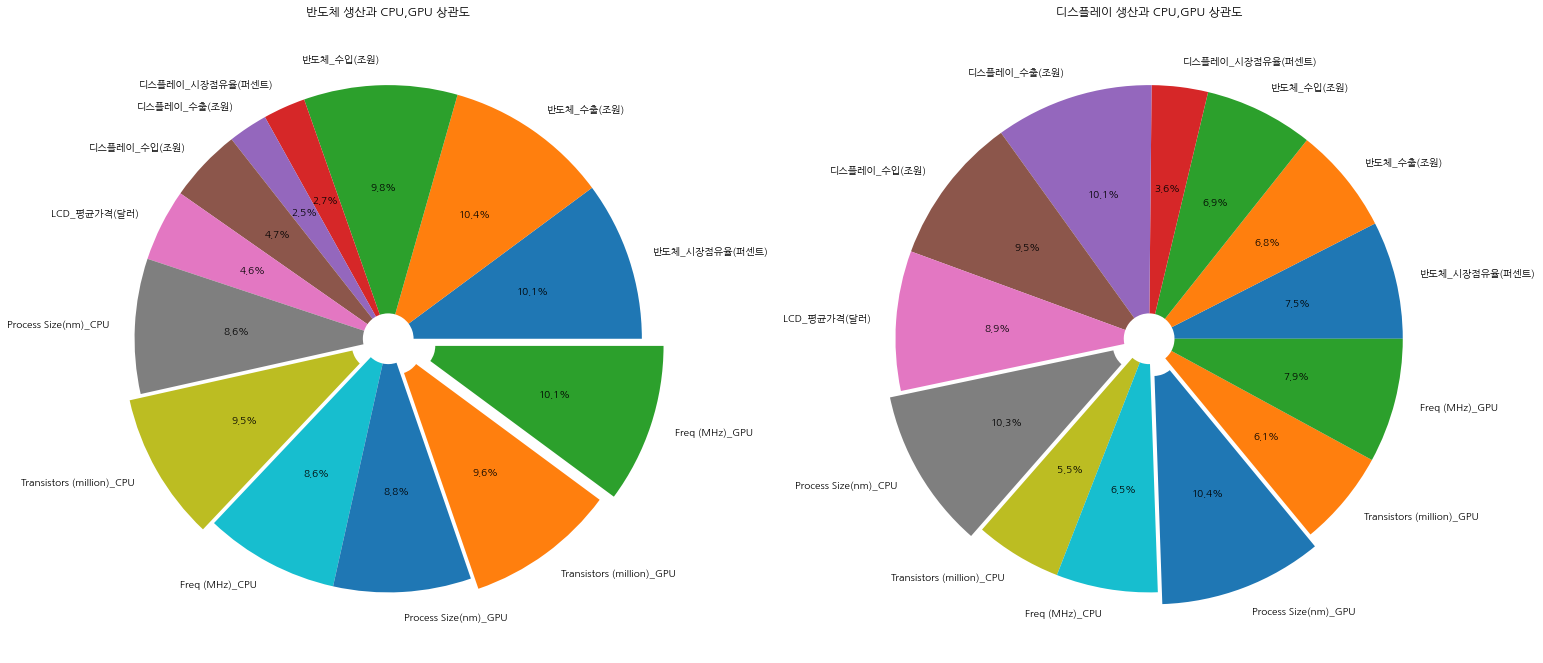

In [279]:
xs = pd_corr['반도체 생산과 상관성']
ys = pd_corr['디스플레이 생산과 상관성']

fig, axe = plt.subplots(1,2, figsize = (25, 12))



#explode를 위한 list
ex_array = np.zeros(len(xs.index))
ex_array[-5] = 0.05
ex_array[-2] = 0.05
ex_array[-1] = 0.09

e_array = np.zeros(len(ys.index))
e_array[-6] = 0.05
e_array[-3] = 0.05


# pie차트
axe[0].pie(xs, labels = xs.index, 
           autopct='%1.1f%%',
           explode = ex_array,
           wedgeprops = dict(width=0.9)
          )
axe[1].pie(ys, labels = ys.index, 
           autopct='%1.1f%%',
           explode = e_array,
           wedgeprops = dict(width=0.9)
          )
axe[0].set_title('반도체 생산과 CPU,GPU 상관도')
axe[1].set_title('디스플레이 생산과 CPU,GPU 상관도')

# 디스플레이 생산은 CPU, GPU의 공정단위와 가장 큰 상관도를 보이고
# 반도체 생산은 CPU와 GPU모두 상관도를 보이나, GPU에 조금 더 큰 상관도를 보인다.

# 반도체 디스플레이 와 CPU및 GPU의 상관도 분석 - 끝

# 반도체에 따른 스마트폰 가격 분석

***회사 별 스마트폰 및 배터리 용량 분석***

In [266]:
df10 = df[2].reset_index()

filter1 = df10['company'] == 'Apple'
filter2 = df10['company'] == 'Samsung'

#df10 = df10.set_index('년도')

df11 = df10[filter1]
df11 = df11.set_index('년도')
df12 = df10[filter2]
df12 = df12.set_index('년도')

df13 = pd.concat((df12, df11), axis = 0)
df13 = df13.reset_index()
df13

,년도,company,Battery Capacity(mAh),Price($)
0,2019,Samsung,4333.333333,425.666667
1,2020,Samsung,5030.769231,544.807692
2,2021,Samsung,4982.222222,438.777778
3,2022,Samsung,4250.000000,646.500000
4,2017,Apple,2691.000000,699.000000
5,2018,Apple,2988.400000,639.000000
6,2019,Apple,3478.142857,849.000000
7,2020,Apple,2141.600000,614.000000
8,2021,Apple,3028.166667,849.000000


<Axes: xlabel='년도', ylabel='Battery Capacity(mAh)'>

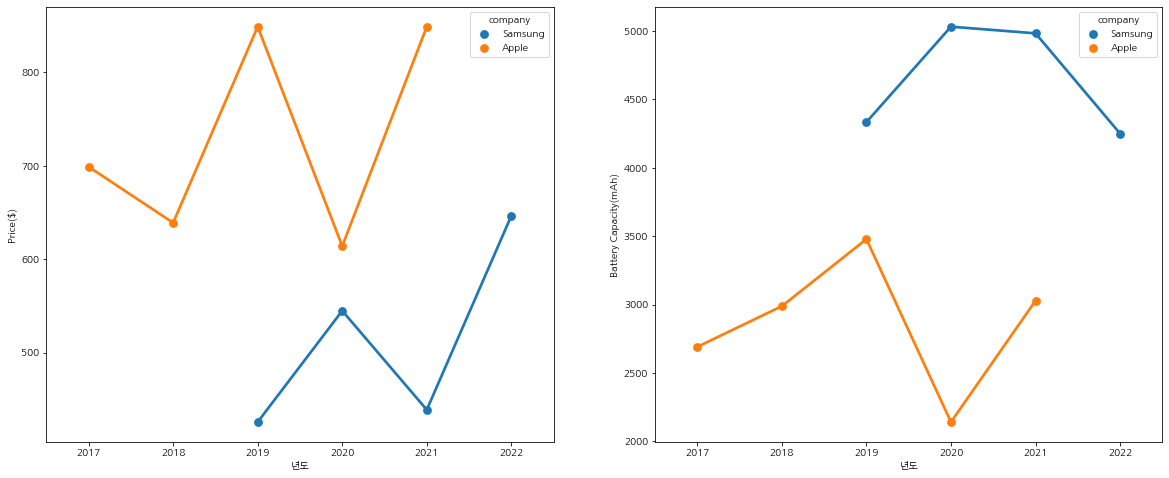

In [267]:
# 배터리 대비 용량 가격

fig, axes = plt.subplots(1,2,figsize = (20,8))


sns.pointplot(data = df13, x = '년도', y = 'Price($)', hue = 'company', ax = axes[0])
sns.pointplot(data = df13, x = '년도', y = 'Battery Capacity(mAh)', hue = 'company', ax = axes[1])

# 가격은 같이 상승과 감소를 한다.
# 배터리용량은 Apple가 적지만 가격은 Apple이 더 높다.
# Apple의 가격의 주된 기준은 배터리 용량이 아니다 ==> 다른 요소라고 생각 가능하다 (ex. 카메라, 외부 디자인, 브랜드 등)

In [268]:
pprice = df10.groupby('년도')
pprice = pprice.mean()

/tmp/ipykernel_3096/2707455518.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pprice = pprice.mean()


In [269]:
pprice = pprice.drop([2022, 2023], axis =0)
pprice

,Battery Capacity(mAh),Price($)
년도,,
2017,2691.000000,699.000000
2018,3622.100000,501.500000
2019,4167.353741,568.523810
2020,4369.074245,436.804943
2021,4572.124870,505.798102


In [270]:
kro_data = kr_data.iloc[-5:, :]
kro_data

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(조원),반도체_수입(조원),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(조원),디스플레이_수입(조원),LCD_평균가격(달러),Process Size(nm)_CPU,Transistors (million)_CPU,Freq (MHz)_CPU,Process Size(nm)_GPU,Transistors (million)_GPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,
2017,119.60,21.4,131.63136,55.33248,3.2,75.50,44.4,36.8256,6.8544,32.5,15.41,3594.94,3026.61,16.18,5283.58,1074.54
2018,143.30,23.7,170.29824,60.11712,3.3,72.60,42.6,33.1968,6.9888,29.4,13.77,3791.78,3022.52,13.83,7581.63,996.77
2019,134.40,18.5,126.24192,63.20832,1.8,67.70,40.2,27.5520,6.3168,28.4,11.36,3149.89,2581.31,12.85,6948.53,988.40
2020,128.89,18.4,133.29792,67.58976,1.6,85.30,36.8,24.1920,4.4352,33.4,10.45,3147.61,3093.48,10.00,12210.49,1023.54
2021,136.01,19.9,172.00512,82.50816,2.9,87.71,33.2,28.7616,3.8976,37.7,10.93,2297.76,2784.11,8.94,14049.44,1032.89


In [271]:
kro_data.index = pprice.index
ph_price = pd.concat((kro_data, pprice), axis = 1)
ph_price

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(조원),반도체_수입(조원),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(조원),디스플레이_수입(조원),LCD_평균가격(달러),Process Size(nm)_CPU,Transistors (million)_CPU,Freq (MHz)_CPU,Process Size(nm)_GPU,Transistors (million)_GPU,Freq (MHz)_GPU,Battery Capacity(mAh),Price($)
년도,,,,,,,,,,,,,,,,,,
2017,119.60,21.4,131.63136,55.33248,3.2,75.50,44.4,36.8256,6.8544,32.5,15.41,3594.94,3026.61,16.18,5283.58,1074.54,2691.000000,699.000000
2018,143.30,23.7,170.29824,60.11712,3.3,72.60,42.6,33.1968,6.9888,29.4,13.77,3791.78,3022.52,13.83,7581.63,996.77,3622.100000,501.500000
2019,134.40,18.5,126.24192,63.20832,1.8,67.70,40.2,27.5520,6.3168,28.4,11.36,3149.89,2581.31,12.85,6948.53,988.40,4167.353741,568.523810
2020,128.89,18.4,133.29792,67.58976,1.6,85.30,36.8,24.1920,4.4352,33.4,10.45,3147.61,3093.48,10.00,12210.49,1023.54,4369.074245,436.804943
2021,136.01,19.9,172.00512,82.50816,2.9,87.71,33.2,28.7616,3.8976,37.7,10.93,2297.76,2784.11,8.94,14049.44,1032.89,4572.124870,505.798102


In [272]:
def check_price_corr(df):
    list6 = []
    for i, col_name in enumerate(df):
        corr = np.corrcoef(df['Price(만)'], df[col_name])[0,1]
        print('')
        print(col_name, "와(과) 스마트폰 가격의 상관도 : ", corr)
        list6.append(corr)
    return list6
        
        
def check_battery_corr(df):
    list7 = []
    for i, col_name in enumerate(df):
        corr = np.corrcoef(df['Battery Capacity(mAh)'], df[col_name])[0,1]
        print('')
        print(col_name, "와(과) 배터리 용량의 상관도 : ", corr)
        list7.append(corr)
    return list7

In [273]:
ph_price['Price(만)'] = ph_price['Price($)'] * 1344 / 10000
ph_price.drop(['Price($)'], axis = 1, inplace = True)
ph_price

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(조원),반도체_수입(조원),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(조원),디스플레이_수입(조원),LCD_평균가격(달러),Process Size(nm)_CPU,Transistors (million)_CPU,Freq (MHz)_CPU,Process Size(nm)_GPU,Transistors (million)_GPU,Freq (MHz)_GPU,Battery Capacity(mAh),Price(만)
년도,,,,,,,,,,,,,,,,,,
2017,119.60,21.4,131.63136,55.33248,3.2,75.50,44.4,36.8256,6.8544,32.5,15.41,3594.94,3026.61,16.18,5283.58,1074.54,2691.000000,93.945600
2018,143.30,23.7,170.29824,60.11712,3.3,72.60,42.6,33.1968,6.9888,29.4,13.77,3791.78,3022.52,13.83,7581.63,996.77,3622.100000,67.401600
2019,134.40,18.5,126.24192,63.20832,1.8,67.70,40.2,27.5520,6.3168,28.4,11.36,3149.89,2581.31,12.85,6948.53,988.40,4167.353741,76.409600
2020,128.89,18.4,133.29792,67.58976,1.6,85.30,36.8,24.1920,4.4352,33.4,10.45,3147.61,3093.48,10.00,12210.49,1023.54,4369.074245,58.706584
2021,136.01,19.9,172.00512,82.50816,2.9,87.71,33.2,28.7616,3.8976,37.7,10.93,2297.76,2784.11,8.94,14049.44,1032.89,4572.124870,67.979265


In [274]:
price_corr = check_price_corr(ph_price)
# 디스플레이 수출이 많은 해에는 스마트폰 가격이 높다.
# CPU및 GPU의 공정 단위가 낮아질수록 스마트폰의 가격은 높아진다.


반도체_생산(조원) 와(과) 스마트폰 가격의 상관도 :  -0.6161807925436309

반도체_시장점유율(퍼센트) 와(과) 스마트폰 가격의 상관도 :  0.22850236827741086

반도체_수출(조원) 와(과) 스마트폰 가격의 상관도 :  -0.37771615345192494

반도체_수입(조원) 와(과) 스마트폰 가격의 상관도 :  -0.5523424055135583

DRAM_가격(달러) 와(과) 스마트폰 가격의 상관도 :  0.4369165538097041

디스플레이_생산(조원) 와(과) 스마트폰 가격의 상관도 :  -0.4644493977441064

디스플레이_시장점유율(퍼센트) 와(과) 스마트폰 가격의 상관도 :  0.6574249730561986

디스플레이_수출(조원) 와(과) 스마트폰 가격의 상관도 :  0.7803418983660031

디스플레이_수입(조원) 와(과) 스마트폰 가격의 상관도 :  0.6041052928324695

LCD_평균가격(달러) 와(과) 스마트폰 가격의 상관도 :  -0.18222686824936907

Process Size(nm)_CPU 와(과) 스마트폰 가격의 상관도 :  0.77003501911428

Transistors (million)_CPU 와(과) 스마트폰 가격의 상관도 :  0.3278447078105618

Freq (MHz)_CPU 와(과) 스마트폰 가격의 상관도 :  -0.11410794247469407

Process Size(nm)_GPU 와(과) 스마트폰 가격의 상관도 :  0.7967161636298179

Transistors (million)_GPU 와(과) 스마트폰 가격의 상관도 :  -0.7443535499112847

Freq (MHz)_GPU 와(과) 스마트폰 가격의 상관도 :  0.5787147622160966

Battery Capacity(mAh) 와(과) 스마트폰 가격의 상관도 :  -0.8179778962278126

Price(만) 와(과) 스마트

In [275]:
bat_corr = check_battery_corr(ph_price)

# 배터리 용량은 CPU, GPU공정 단위에 아주 큰 상관도를 보인다.
# 또한 디스플레이 수출이 적은해에 배터리 용량은 커진다.
# GPU의 Transistor 갯수가 많아질수록, CPU의 Transistor 갯수가 적어질수록 배터리 용량은 커진다. 


반도체_생산(조원) 와(과) 배터리 용량의 상관도 :  0.5159523241457352

반도체_시장점유율(퍼센트) 와(과) 배터리 용량의 상관도 :  -0.5825565043448652

반도체_수출(조원) 와(과) 배터리 용량의 상관도 :  0.24899636687996515

반도체_수입(조원) 와(과) 배터리 용량의 상관도 :  0.8167714612710627

DRAM_가격(달러) 와(과) 배터리 용량의 상관도 :  -0.5798199313887066

디스플레이_생산(조원) 와(과) 배터리 용량의 상관도 :  0.4559181435160394

디스플레이_시장점유율(퍼센트) 와(과) 배터리 용량의 상관도 :  -0.8900971575937144

디스플레이_수출(조원) 와(과) 배터리 용량의 상관도 :  -0.8924280223007137

디스플레이_수입(조원) 와(과) 배터리 용량의 상관도 :  -0.7836524082993032

LCD_평균가격(달러) 와(과) 배터리 용량의 상관도 :  0.33017579902999333

Process Size(nm)_CPU 와(과) 배터리 용량의 상관도 :  -0.9684102261815756

Transistors (million)_CPU 와(과) 배터리 용량의 상관도 :  -0.7399713968607103

Freq (MHz)_CPU 와(과) 배터리 용량의 상관도 :  -0.4008980047499881

Process Size(nm)_GPU 와(과) 배터리 용량의 상관도 :  -0.9391031840600658

Transistors (million)_GPU 와(과) 배터리 용량의 상관도 :  0.8218313285969486

Freq (MHz)_GPU 와(과) 배터리 용량의 상관도 :  -0.5575451255026225

Battery Capacity(mAh) 와(과) 배터리 용량의 상관도 :  0.9999999999999999

Price(만) 와(과) 배터리 용량의 상관도 :  -0.

In [276]:
pr_corr = pd.DataFrame(price_corr)
batt_corr = pd.DataFrame(bat_corr)

list8 = ['반도체_생산(조원)', '반도체_시장점유율(퍼센트)', '반도체_수출(조원)', '반도체_수입(조원)', 'DRAM_가격(달러)', '디스플레이_생산(조원)', '디스플레이_시장점유율(퍼센트)', '디스플레이_수출(조원)', '디스플레이_수입(조원)', 'LCD_평균가격(달러)', 'Process Size(nm)_CPU', 'Transistors (million)_CPU', 'Freq (MHz)_CPU', 'Process Size(nm)_GPU', 'Transistors (million)_GPU', 'Freq (MHz)_GPU', 'Battery Capacity(mAh)', 'Price(만)']
df_list9 = pd.DataFrame(list8)
df_cor = pd.concat((pr_corr, batt_corr, df_list9), axis = 1)


In [277]:
df_cor.columns = ['스마트폰 가격과 상관도', '배터리 용량과 상관도', 'index']

df_cor = df_cor.drop([4, 16, 17], axis = 0)
df_cor

,스마트폰 가격과 상관도,배터리 용량과 상관도,index
0,-0.616181,0.515952,반도체_생산(조원)
1,0.228502,-0.582557,반도체_시장점유율(퍼센트)
2,-0.377716,0.248996,반도체_수출(조원)
3,-0.552342,0.816771,반도체_수입(조원)
5,-0.464449,0.455918,디스플레이_생산(조원)
6,0.657425,-0.890097,디스플레이_시장점유율(퍼센트)
7,0.780342,-0.892428,디스플레이_수출(조원)
8,0.604105,-0.783652,디스플레이_수입(조원)
9,-0.182227,0.330176,LCD_평균가격(달러)
10,0.770035,-0.968410,Process Size(nm)_CPU


In [278]:
df_cor = df_cor.set_index('index')

df_cor['스마트폰 가격과 상관도'] = abs(df_cor['스마트폰 가격과 상관도'])
df_cor['배터리 용량과 상관도'] = abs(df_cor['배터리 용량과 상관도'])
df_cor

,스마트폰 가격과 상관도,배터리 용량과 상관도
index,,
반도체_생산(조원),0.616181,0.515952
반도체_시장점유율(퍼센트),0.228502,0.582557
반도체_수출(조원),0.377716,0.248996
반도체_수입(조원),0.552342,0.816771
디스플레이_생산(조원),0.464449,0.455918
디스플레이_시장점유율(퍼센트),0.657425,0.890097
디스플레이_수출(조원),0.780342,0.892428
디스플레이_수입(조원),0.604105,0.783652
LCD_평균가격(달러),0.182227,0.330176


Text(0.5, 1.0, '배터리 용량과 상관도')

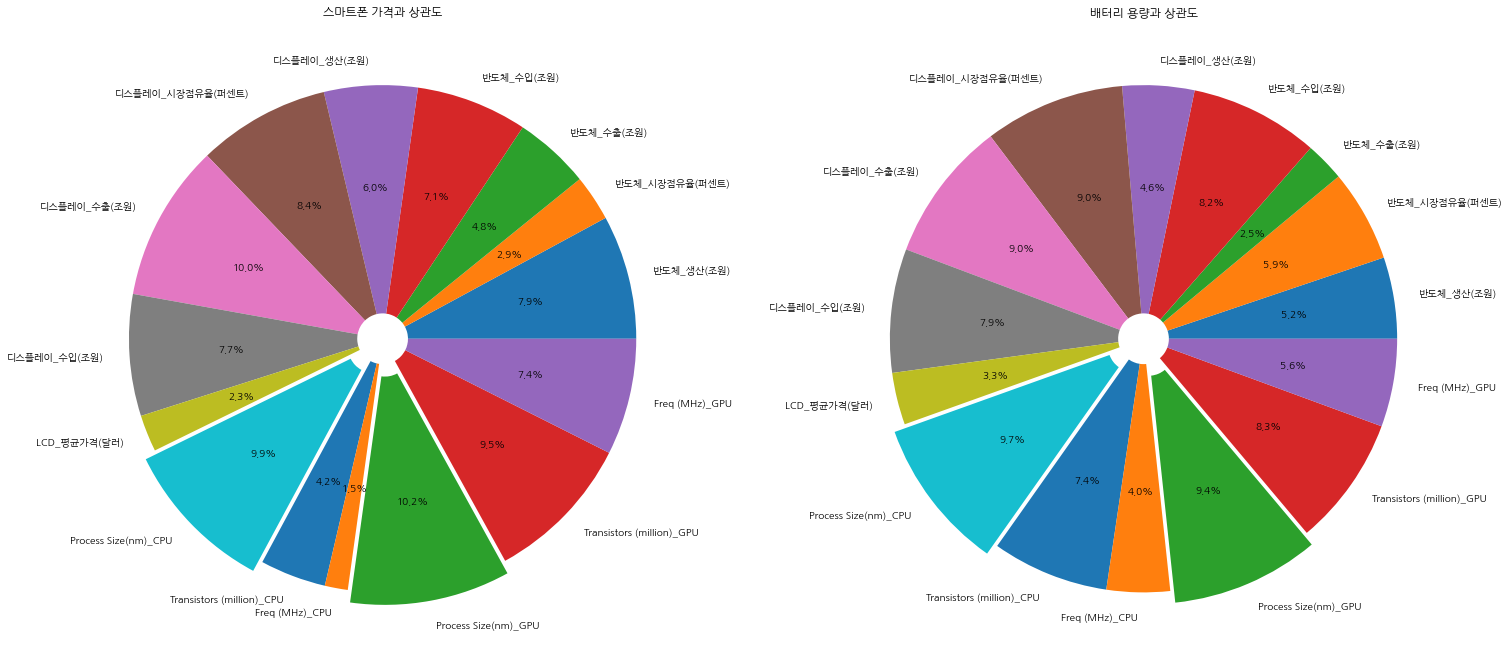

In [282]:
xs = df_cor['스마트폰 가격과 상관도']
ys = df_cor['배터리 용량과 상관도']

fig, axe = plt.subplots(1,2, figsize = (25, 12))



#explode를 위한 list
ex_array = np.zeros(len(xs.index))
ex_array[-6] = 0.05
ex_array[-3] = 0.05

e_array = np.zeros(len(ys.index))
e_array[-6] = 0.05
e_array[-3] = 0.05


# pie차트
axe[0].pie(xs, labels = xs.index, 
           autopct='%1.1f%%',
           explode = ex_array,
           wedgeprops = dict(width=0.9)
          )
axe[1].pie(ys, labels = ys.index, 
           autopct='%1.1f%%',
           explode = e_array,
           wedgeprops = dict(width=0.9)
          )
axe[0].set_title('스마트폰 가격과 상관도')
axe[1].set_title('배터리 용량과 상관도')


# 배터리 용량과 스마트폰 가격은 CPU, GPU의 공정단위에 가장 큰 상관도를 보인다.

In [80]:
# CPU 공정단위에 따른 스마트폰 가격 예측

ph_price = ph_price.reset_index()
ph_price

xs = ph_price['Process Size(nm)_CPU']
ys = ph_price['Price(만)']

xs_mean = xs.mean()
ys_mean = ys.mean()
xs_std = xs.std()
ys_std = ys.std()

print('mean(xs, ys) : ', xs_mean,'\t', ys_mean)
print('std(xs, ys) : ', xs_std, '\t', ys_std)
xy_corr = np.corrcoef(xs, ys)[0,1]
print('corrcoef : ', xy_corr)

# 기울기
slope = xy_corr * (ys_std / xs_std)
# y값
intercept = ys_mean - (slope * xs_mean)
print('intercept : ', intercept)

ys_pred = xs*slope+intercept

mean(xs, ys) :  12.383999999999999 	 72.8885298394914
std(xs, ys) :  2.120183954283213 	 13.333538529879267
corrcoef :  0.77003501911428
intercept :  12.917252877005083


In [81]:
# GPU 공정단위에 따른 스마트폰 가격 예측

ph_price = ph_price.reset_index()
ph_price

xs_g = ph_price['Process Size(nm)_GPU']
ys_g = ph_price['Price(만)']

xs_mean = xs.mean()
ys_mean = ys.mean()
xs_std = xs.std()
ys_std = ys.std()

print('mean(xs, ys) : ', xs_mean,'\t', ys_mean)
print('std(xs, ys) : ', xs_std, '\t', ys_std)
xy_corr = np.corrcoef(xs, ys)[0,1]
print('corrcoef : ', xy_corr)

# 기울기
slope = xy_corr * (ys_std / xs_std)
# y값
intercept = ys_mean - (slope * xs_mean)
print('intercept : ', intercept)

ysg_pred = xs*slope+intercept

mean(xs, ys) :  12.383999999999999 	 72.8885298394914
std(xs, ys) :  2.120183954283213 	 13.333538529879267
corrcoef :  0.77003501911428
intercept :  12.917252877005083


Text(0.5, 1.0, 'GPU 나노공정에 따른 스마트폰 가격예측')

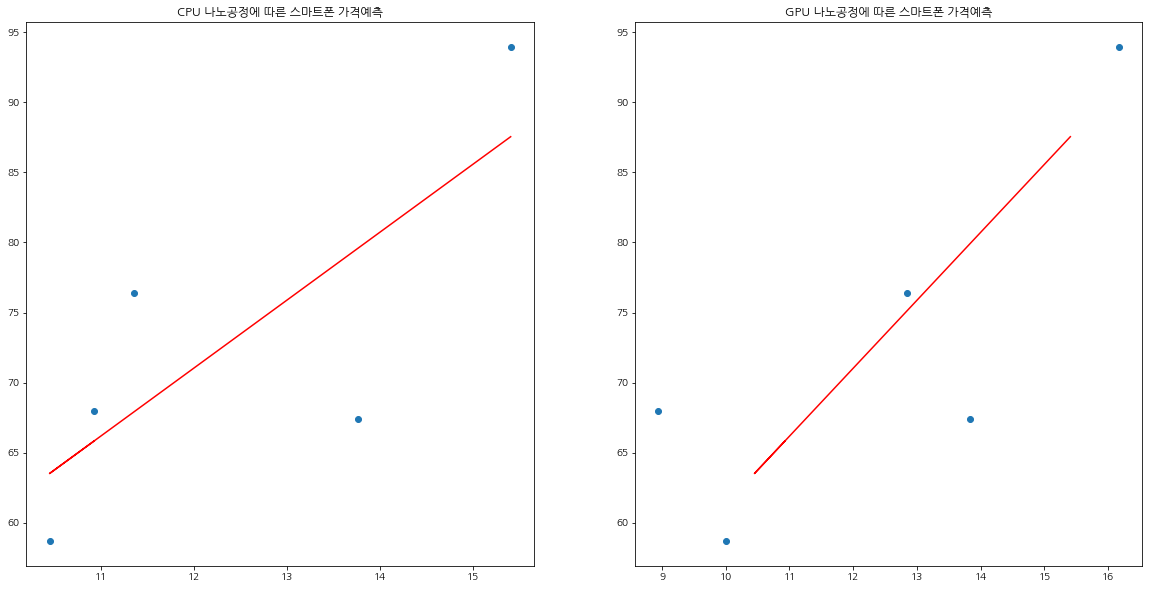

In [82]:
fig, axe = plt.subplots(1,2, figsize = (20,10))
axe[0].scatter(xs , ys)
axe[0].plot(xs, ys_pred, c = 'r')
axe[0].set_title('CPU 나노공정에 따른 스마트폰 가격예측')

axe[1].scatter(xs_g , ys_g)
axe[1].plot(xs, ysg_pred, c = 'r')
axe[1].set_title('GPU 나노공정에 따른 스마트폰 가격예측')